In [1]:
from pcgym import make_env
import numpy as np 
from stable_baselines3 import PPO

In [2]:
T = 26
nsteps = 100
SP = {
    'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

In [3]:
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}

r_scale ={
    'Ca': 1e3 #Reward scale for each state
}

# Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}


env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, # Setpoint
    'o_space' : observation_space, # Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions 
    'model': 'cstr', # Select the model
    'normalise_a': True, # Normalise the actions
    'normalise_o':True, # Normalise the states,
    'noise':True, # Add noise to the states
    'integration_method': 'casadi', # Select the integration method
    'r_scale': r_scale, # Reward scaling
    'noise_percentage':{'Ca':0.01,'T':0.0005}, # Noise percentage
    'partial_observation':['T'] # Only temperature is observed

    
}
env = make_env(env_params)

c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [4]:
print(env.reset())
print(env.step(np.array([0.5])))

(array([ 0.        ,  0.2       , -1.00000024]), {'obs': array([-0.33333328,  0.2       , -1.00000024]), 'r_init': 0})
(array([0.00000000e+00, 1.51530814e-01, 1.19209332e-07]), -1.7989126868592233, False, False, {'obs': array([-2.52187447e-01,  1.51530814e-01,  1.19209332e-07]), 'r_init': 0})


In [5]:
nsteps_learning = 1e4
PPO_policy = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001).learn(nsteps_learning)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\mfb22\AppData\Local\anaconda3\envs\pcgym_test\Lib\site-packages\gymnasium\spaces\box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99       |
|    ep_rew_mean     | -70.6    |
| time/              |          |
|    fps             | 861      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 99           |
|    ep_rew_mean          | -100         |
| time/                   |              |
|    fps                  | 643          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0055217883 |
|    clip_fraction        | 0.0451       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.41        |
|    explained_variance   | 0.003        |
|    learning_r

obs replaced
[-0.33333328  0.2        -1.00000024]
obs replaced
[-2.84115315e-01  1.84699797e-01  1.19209332e-07]
obs replaced
[-3.04054792e-01  1.27063242e-01  1.19209332e-07]
obs replaced
[-2.84258207e-01  8.92817825e-02  1.19209332e-07]
obs replaced
[-1.69793899e-01  5.91808818e-02  1.19209332e-07]
obs replaced
[-2.71966026e-02  3.01466684e-02  1.19209332e-07]
obs replaced
[-1.13828371e-02  8.90369147e-03  1.19209332e-07]
obs replaced
[6.46427486e-02 9.68084728e-03 1.19209332e-07]
obs replaced
[ 5.80816333e-02 -4.73327560e-03  1.19209332e-07]
obs replaced
[4.31148707e-02 8.53972893e-03 1.19209332e-07]
obs replaced
[ 2.03261597e-01 -1.19943441e-02  1.19209332e-07]
obs replaced
[ 9.60923901e-02 -1.99964760e-02  1.19209332e-07]
obs replaced
[ 1.61275636e-01 -1.42802276e-02  1.19209332e-07]
obs replaced
[ 1.17147385e-01 -2.98919869e-03  1.19209332e-07]
obs replaced
[1.05733506e-01 8.97244195e-04 1.19209332e-07]
obs replaced
[ 1.61965779e-01 -7.25032913e-03  1.19209332e-07]
obs replaced


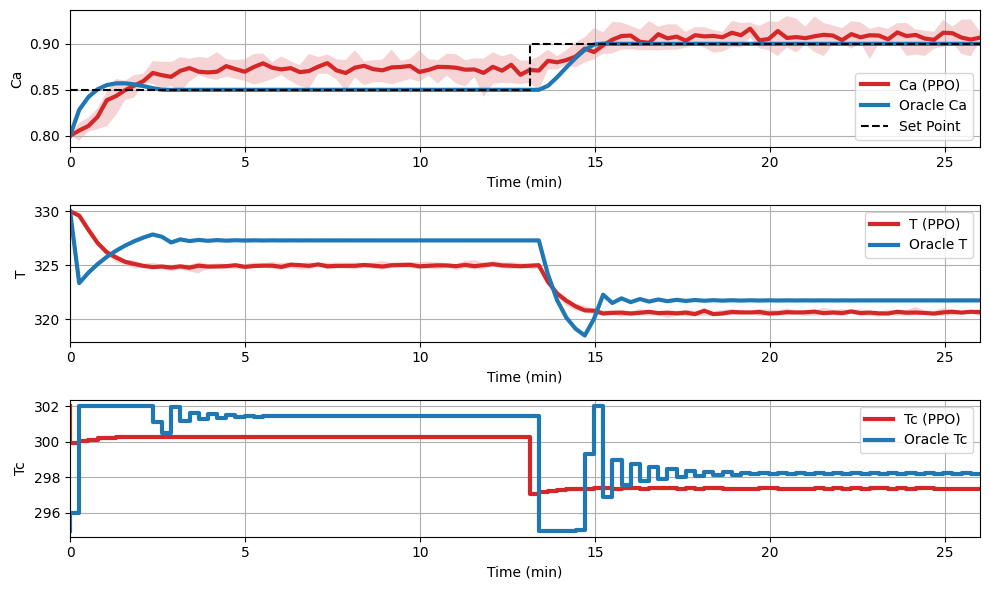

In [6]:

evaluator, data = env.plot_rollout({'PPO': PPO_policy}, oracle = True, reps = 10)